<a href="https://colab.research.google.com/github/aykansandal/190503012_AykanBerkeSandal/blob/master/AYKAN_BERKE_SANDAL_Hausaufgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hausaufgabe
Dies ist die Hausaufgabe zur Veranstaltung Data-Mining.
Hierzu gibt es eine Datei mit Daten, die mit DatenHAVorlage.csv bezeichnet und ebenfalls hier im Google Classroom zu finden ist.
Binden Sie diese Datei in dieses Projekt ein und laden Sie die Daten in ein DataFrame-Objekt.
Bearbeiten Sie die Daten so, wie es in den einzelnen sieben Aufgaben in diesem Jupyter-Notebook steht.
Beantworten Sie die Fragen, die in den Aufgaben stehen, ebenfalls in diesem Jupyter-Notebook.
Bearbeiten Sie die Aufgaben jeweils alleine und geben Sie das fertige und lauffähige Jupyter-Notebook bis zum 12. Januar 2024 im Google Classroom ab.
Viel Erfolg bei der Bearbeitung.
Bei Fragen wenden Sie sich bitte an mich: kai.bruessau@gmail.com mit dem Betreff „Hausaufgabe Data-Mining“


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset = pd.read_csv('drive/MyDrive/AYKAN BERKE SANDAL - DatenHAVorlage.csv', delimiter=";")
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4000 non-null   float64
 1   x2      4000 non-null   float64
 2   x3      3999 non-null   float64
 3   x4      3999 non-null   float64
 4   x5      4000 non-null   int64  
 5   x6      3998 non-null   object 
 6   y       4000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 218.9+ KB


(4000, 7)

In [3]:
dataset.head()

,x1,x2,x3,x4,x5,x6,y
0,41.976,6.307,34.376,0.214,1,rot,-0.909
1,129.615,13.146,1.955,0.959,0,rot,16.593
2,228.441,28.289,38.486,0.513,1,blau,2.084
3,167.988,25.258,18.643,0.996,1,blau,2.907
4,161.769,19.491,20.413,20.847,0,gelb,8.545


###Aufgabe 1

1.   Identifizieren Sie Ausreißer. Berechnen Sie dazu den Z-Score und löschen Sie alle Datensätze, die Ausreißer enthalten.
2.   Wie gehen Sie mit den fehlenden Werten um?



**1) Ausreißer Identifizieren und Löschen**

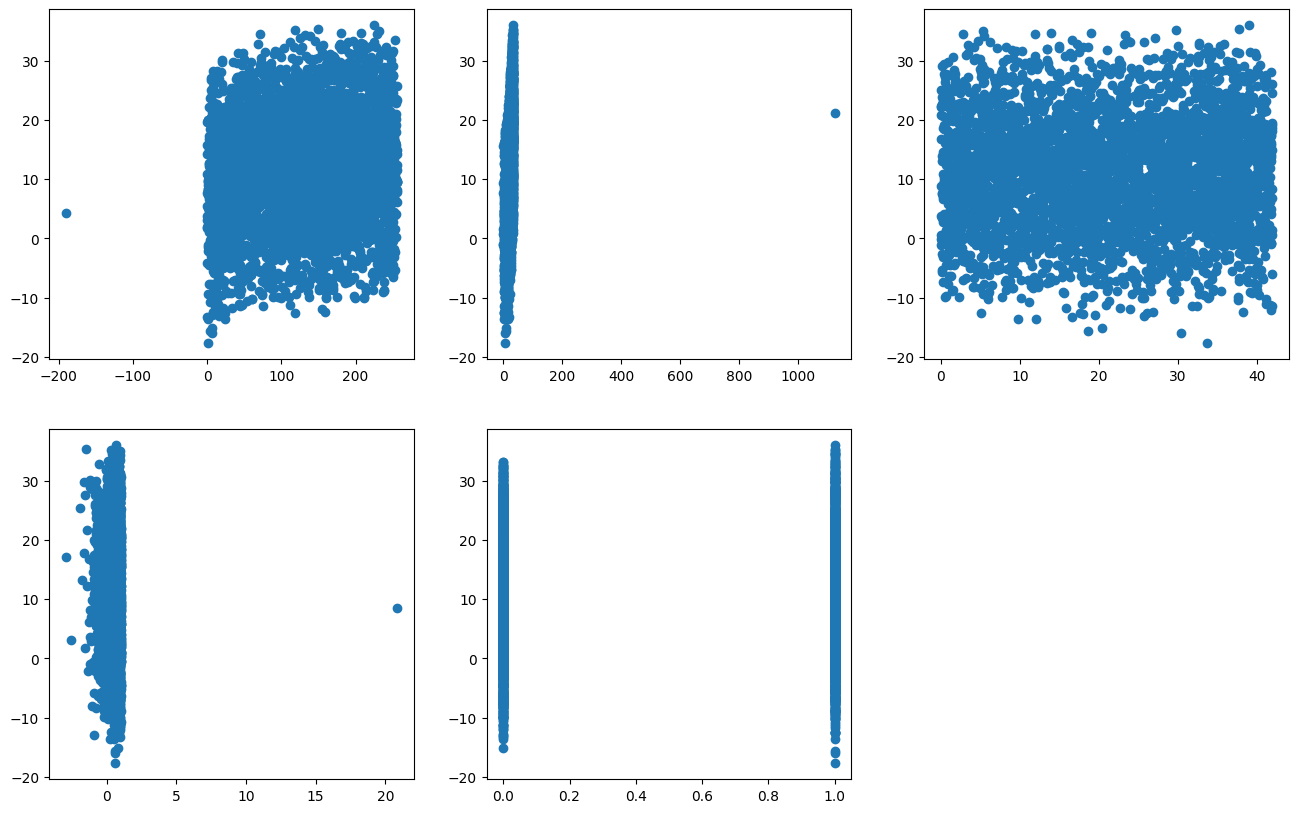

In [4]:
# Datensatz vor dem Löschen der Ausreißer
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
plt.scatter(dataset["x1"],dataset["y"])
plt.subplot(2,3,2)
plt.scatter(dataset["x2"],dataset["y"])
plt.subplot(2,3,3)
plt.scatter(dataset["x3"],dataset["y"])
plt.subplot(2,3,4)
plt.scatter(dataset["x4"],dataset["y"])
plt.subplot(2,3,5)
plt.scatter(dataset["x5"],dataset["y"])
plt.show()

In [5]:
# Kalkulieren von 'Z-score' für jeden numerisches Merkmal
dataset['z_score_y']=(dataset['y'] - dataset['y'].mean())/dataset['y'].std()
dataset['z_score_x1']=(dataset['x1'] - dataset['x1'].mean())/dataset['x1'].std()
dataset['z_score_x2']=(dataset['x2'] - dataset['x2'].mean())/dataset['x2'].std()
dataset['z_score_x3']=(dataset['x3'] - dataset['x3'].mean())/dataset['x3'].std()
dataset['z_score_x4']=(dataset['x4'] - dataset['x4'].mean())/dataset['x4'].std()
dataset.head()

,x1,x2,x3,x4,x5,x6,y,z_score_y,z_score_x1,z_score_x2,z_score_x3,z_score_x4
0,41.976,6.307,34.376,0.214,1,rot,-0.909,-1.261542,-1.162580,-0.846738,1.083382,-0.659354
1,129.615,13.146,1.955,0.959,0,rot,16.593,0.593980,0.027855,-0.488236,-1.585986,0.731319
2,228.441,28.289,38.486,0.513,1,blau,2.084,-0.944231,1.370248,0.305563,1.421777,-0.101218
3,167.988,25.258,18.643,0.996,1,blau,2.907,-0.856978,0.549091,0.146677,-0.211987,0.800386
4,161.769,19.491,20.413,20.847,0,gelb,8.545,-0.259251,0.464616,-0.155630,-0.066255,37.855740


In [6]:
# Löschen der Ausreißer
dataset_filtered = dataset[
    (dataset['z_score_y'] > -3) & (dataset['z_score_y'] < 3) &
    (dataset['z_score_x1'] > -3) & (dataset['z_score_x1'] < 3) &
    (dataset['z_score_x2'] > -3) & (dataset['z_score_x2'] < 3) &
    (dataset['z_score_x3'] > -3) & (dataset['z_score_x3'] < 3) &
    (dataset['z_score_x4'] > -3) & (dataset['z_score_x4'] < 3)
]

dataset_filtered.drop(['z_score_y', 'z_score_x1', 'z_score_x2', 'z_score_x3', 'z_score_x4'], axis=1, inplace=True)

dataset = dataset_filtered

In [7]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3969 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3969 non-null   float64
 1   x2      3969 non-null   float64
 2   x3      3969 non-null   float64
 3   x4      3969 non-null   float64
 4   x5      3969 non-null   int64  
 5   x6      3967 non-null   object 
 6   y       3969 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 248.1+ KB


(3969, 7)

In [8]:
dataset.head()

,x1,x2,x3,x4,x5,x6,y
0,41.976,6.307,34.376,0.214,1,rot,-0.909
1,129.615,13.146,1.955,0.959,0,rot,16.593
2,228.441,28.289,38.486,0.513,1,blau,2.084
3,167.988,25.258,18.643,0.996,1,blau,2.907
5,18.750,30.176,2.612,0.500,1,blau,0.534


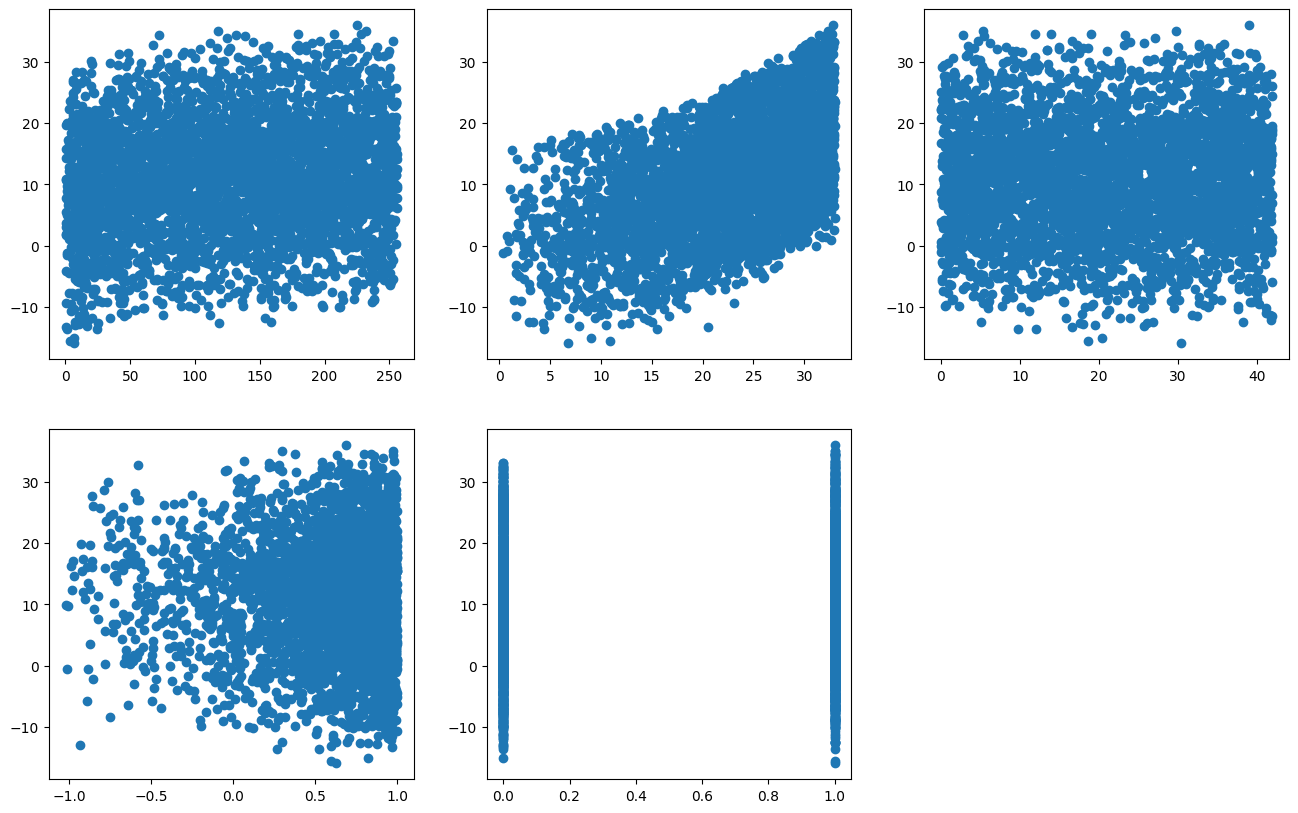

In [9]:
# Datensatz nach dem Löschen der Ausreißer
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
plt.scatter(dataset["x1"],dataset["y"])
plt.subplot(2,3,2)
plt.scatter(dataset["x2"],dataset["y"])
plt.subplot(2,3,3)
plt.scatter(dataset["x3"],dataset["y"])
plt.subplot(2,3,4)
plt.scatter(dataset["x4"],dataset["y"])
plt.subplot(2,3,5)
plt.scatter(dataset["x5"],dataset["y"])
plt.show()

**2) Gehen mit dem fehlenden Daten**

In [10]:
pd.isnull(dataset).sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    2
y     0
dtype: int64

In [11]:
dataset["x6"].value_counts()

blau    1964
rot     1011
gelb     992
Name: x6, dtype: int64

In [12]:
dataset["x3"].fillna(dataset["x3"].mean(), inplace=True)
dataset["x4"].fillna(dataset["x4"].mean(), inplace=True)
dataset["x6"].fillna('blau', inplace=True)
dataset["x6"].value_counts()

blau    1966
rot     1011
gelb     992
Name: x6, dtype: int64

In [13]:
pd.isnull(dataset).sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
y     0
dtype: int64

##Aufgabe 2
Transformieren Sie die Kategorien der Variablen x5 (gelb, blau, rot) mittels Dummy-Encoding in drei Binärvariablen

In [14]:
dummy = pd.get_dummies(dataset['x6'],
                         prefix='x6',
                         drop_first=False)
dummy

,x6_blau,x6_gelb,x6_rot
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
5,1,0,0
...,...,...,...
3995,1,0,0
3996,1,0,0
3997,0,0,1
3998,1,0,0


In [15]:
dummy_dataset = pd.get_dummies(dataset, prefix='x6',
                            columns=['x6'],
                            drop_first=False)
dataset = dummy_dataset
dataset.head()

,x1,x2,x3,x4,x5,y,x6_blau,x6_gelb,x6_rot
0,41.976,6.307,34.376,0.214,1,-0.909,0,0,1
1,129.615,13.146,1.955,0.959,0,16.593,0,0,1
2,228.441,28.289,38.486,0.513,1,2.084,1,0,0
3,167.988,25.258,18.643,0.996,1,2.907,1,0,0
5,18.750,30.176,2.612,0.500,1,0.534,1,0,0


##Aufgabe 3


1.   Erstellen Sie eine Korrelationsmatrix.
2.   Bewerten Sie die Korrelation.



**1)Erstellung der Korrelationsmatrix**



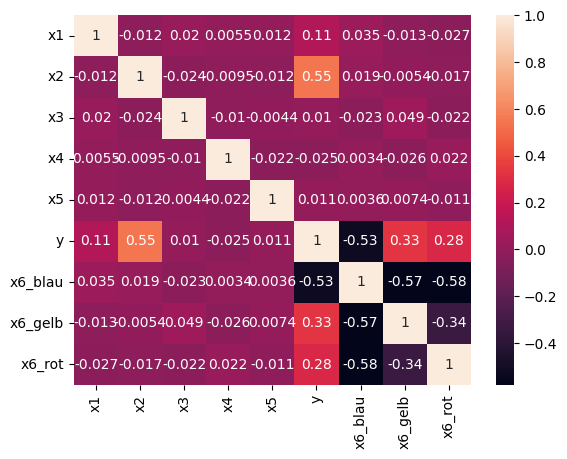

In [16]:
#corr_matrix = dataset.drop(["x6_gelb"],axis=1).corr()
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**2) Bewertung der Korrelation**


Die Methode ***corr()*** verwendet standardmäßig den Pearson-Korrelationskoeffizienten. Die Pearson-Korrelation ist ein Maß für die lineare Beziehung zwischen zwei Variablen. Er reicht von -1 bis 1, wobei:

* Werte nahe bei 1 oder -1 zeigen eine stärkere lineare Beziehung an.
* 1 steht für eine perfekte positive lineare Beziehung
* -1 steht für eine perfekte negative lineare Beziehung
* Werte nahe bei 0 zeigen eine schwächere lineare Beziehung an.
* 0 zeigt keine lineare Beziehung an.

***Stärke der Korrelation:***

* 0,0 bis 0,2: Sehr schwache Korrelation
* 0,2 bis 0,4: Schwache Korrelation
* 0,4 bis 0,6: Moderate Korrelation
* 0,6 bis 0,8: Starke Korrelation
* 0,8 bis 1,0: Sehr starke Korrelation

***Richtung der Korrelation:***

* **Positive Korrelation:** Wenn eine Variable zunimmt, nimmt die andere tendenziell zu.
* **Negative Korrelation:** Wenn eine Variable zunimmt, nimmt die andere tendenziell ab.




**Beispiele für unseren Dataframe:**
*   Feature "x2" und Zielvariable "y" sind moderat positiv korreliert.
*   Feature "x6_gelb" und Zielvariable "y" sind schwach positiv korreliert.
*   Feature "x6_blau" und Zielvariable "y" sind moderat negativ korreliert.
*   Feature "x6_blau" und x6_rot" sind moderat negativ korreliert und der Wert ist -0,58. Also, Feature "x6_blau" und x6_gelb" sind moderat negativ korreliert und der Wert ist -0,57. Dies ist sinnvoll, da wir bei der Dummy-Kodierung die drei Kategorien in drei kontinuierliche Variablen aufteilen und nur eine Farbe den Wert "1" annehmen kann. Wenn sie blau ist, kann sie nicht rot oder gelb sein (negative Korrelation). Wenn wir die Zahl in unserem Datensatz betrachten:\
blau 1966\
rot 1011\
gelb 992\
macht das Ergebnis der Pearson-Korrelation Sinn.

##Aufgabe 4
Erstellen Sie eine multiple lineare Regression mit den Inputwerten. Achten Sie dabei darauf, dass die Variablen aus dem Dummy-Encoding eine multikollineare Abhängigkeit aufweisen, so dass Sie nur zwei der drei Variablen verwenden dürfen.

In [17]:
import statsmodels.api as sm
data_x = dataset.drop(['y', 'x6_gelb'],axis=1)
data_y = dataset.y
model = sm.OLS(data_y,data_x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              2865.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):                        0.00
Time:                        16:28:11   Log-Likelihood:                         -12658.
No. Observations:                3969   AIC:                                  2.533e+04
Df Residuals:                    3962   BIC:                                  2.537e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0169      0.001     14.274      0.000       0.015       0.019
x2             0.6585      0.009     70.574      0.000       0.640       0.677
x3            -0.0009      0.007     -0.133      0.894      -0.015       0.013
x4            -0.5634      0.223     -2.527      0.012      -1.000      -0.126
x5             0.2484      0.182      1.365      0.172      -0.108       0.605
x6_blau      -10.7386      0.215    -49.909      0.000     -11.160     -10.317
x6_rot        -0.8149      0.249     -3.272      0.001      -1.303      -0.327
==============================================================================
Omnibus:                     1420.903   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.434
Skew:                          -0.007   Prob(JB):                     9.92e-43
Kurtosis:                       1.919   Cond. No.                         473.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Aufgabe 5
Wie sind die Ergebnisse zu interpretieren?

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              2865.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):                        0.00
Time:                        16:28:11   Log-Likelihood:                         -12658.
No. Observations:                3969   AIC:                                  2.533e+04
Df Residuals:                    3962   BIC:                                  2.537e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0169      0.001     14.274      0.000       0.015       0.019
x2             0.6585      0.009     70.574      0.000       0.640       0.677
x3            -0.0009      0.007     -0.133      0.894      -0.015       0.013
x4            -0.5634      0.223     -2.527      0.012      -1.000      -0.126
x5             0.2484      0.182      1.365      0.172      -0.108       0.605
x6_blau      -10.7386      0.215    -49.909      0.000     -11.160     -10.317
x6_rot        -0.8149      0.249     -3.272      0.001      -1.303      -0.327
==============================================================================
Omnibus:                     1420.903   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.434
Skew:                          -0.007   Prob(JB):                     9.92e-43
Kurtosis:                       1.919   Cond. No.                         473.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-Quadrat ist ein Maß dafür, wie gut die unabhängigen Variablen die Varianz der abhängigen Variable erklären. Ein R-Quadrat von 0,835 bedeutet, dass etwa 83,5 % der Varianz der abhängigen Variable durch die unabhängigen Variablen erklärt werden.

* Das adjusted R-Quadrat ist eine modifizierte Version des R-Quadrats, das um die Anzahl der Prädiktoren im Modell bereinigt wird.

* Die Standardfehler stellen die Variabilität der Koeffizienten dar.
Kleinere Standardfehler bedeuten genauere Schätzungen.

* Die t-Statistik ist der Koeffizient geteilt durch seinen Standardfehler. Sie misst, wie viele Standardabweichungen der Koeffizient von Null entfernt ist. Ein größerer absoluter t-Wert deutet auf eine signifikantere Variable hin.

* Der p-Wert testet die Nullhypothese, dass der Koeffizient gleich Null ist. Ein niedriger p-Wert (in der Regel unter 0,05) zeigt an, dass die Variable statistisch signifikant ist.

* Features x1,x2,x4,x5,x6 sind signifikant **->** p Nähe zu 0, größe |t|

* Featrue x3 ist insignifikant **->** p Nähe zu 1, kleine |t|

##Aufgabe 6
Erstellen Sie zur Lösung des Problems ein dreischichtiges Multi Layer Perceptron.
Verändern Sie die Anzahl der Neuronen (z.B. 10 und 30) der versteckten Schicht und verwenden Sie zwei verschiedene Aktivierungsfunktionen ('sigmoid' und 'relu') und vergleichen Sie die Ergebnisse.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state = 0)
X_train.shape

(3175, 7)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model.add(Dense(10,activation='sigmoid'))

#Outputlayer mit einem Neuronen
model.add(Dense(1))


model.compile(optimizer=Adam(0.001), loss='mse')

In [21]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

Epoch 1/2000
13/13 [==============================] - 2s 38ms/step - loss: 252.2785 - val_loss: 243.9316
Epoch 2/2000
13/13 [==============================] - 0s 9ms/step - loss: 246.7948 - val_loss: 238.9112
Epoch 3/2000
13/13 [==============================] - 0s 8ms/step - loss: 241.2394 - val_loss: 232.5862
Epoch 4/2000
13/13 [==============================] - 0s 18ms/step - loss: 233.1010 - val_loss: 220.3637
Epoch 5/2000
13/13 [==============================] - 0s 18ms/step - loss: 217.7407 - val_loss: 202.1876
Epoch 6/2000
13/13 [==============================] - 0s 14ms/step - loss: 203.0516 - val_loss: 191.8716
Epoch 7/2000
13/13 [==============================] - 0s 9ms/step - loss: 194.9550 - val_loss: 184.3737
Epoch 8/2000
13/13 [==============================] - 0s 18ms/step - loss: 187.2612 - val_loss: 177.4860
Epoch 9/2000
13/13 [==============================] - 0s 22ms/step - loss: 183.0953 - val_loss: 175.0994
Epoch 10/2000
13/13 [==============================] - 0s 

In [22]:
yn_train_pred = model.predict(X_train)
yn_test_pred = model.predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

25/25 [==============================] - 0s 1ms/step
Trainingsdaten
MAE:  4.981187257017601
MSE:  33.2180463203684
RMSE:  5.763509895920055
R2:  0.6334413688581868

Testdaten
MAE:  4.886121300094374
MSE:  32.85981316091117
RMSE:  5.732347962302287
R2:  0.5880695214690697


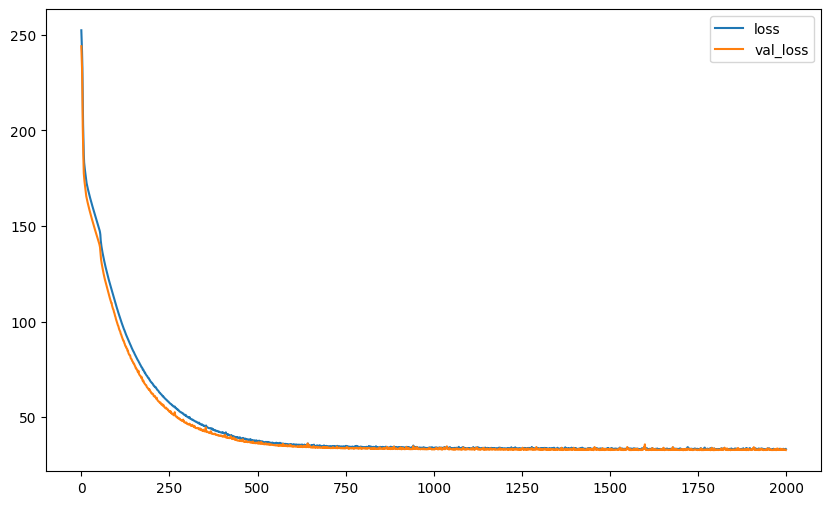

In [23]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [24]:
model2 = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model2.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model2.add(Dense(30,activation='sigmoid'))

#Outputlayer mit einem Neuronen
model2.add(Dense(1))


model2.compile(optimizer=Adam(0.001), loss='mse')

In [25]:
r2 = model2.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

Epoch 1/2000
13/13 [==============================] - 1s 24ms/step - loss: 187.7995 - val_loss: 176.0025
Epoch 2/2000
13/13 [==============================] - 0s 6ms/step - loss: 179.6870 - val_loss: 168.0966
Epoch 3/2000
13/13 [==============================] - 0s 8ms/step - loss: 169.8033 - val_loss: 156.0264
Epoch 4/2000
13/13 [==============================] - 0s 7ms/step - loss: 161.3015 - val_loss: 150.6932
Epoch 5/2000
13/13 [==============================] - 0s 7ms/step - loss: 155.9538 - val_loss: 145.3746
Epoch 6/2000
13/13 [==============================] - 0s 6ms/step - loss: 149.2574 - val_loss: 136.9524
Epoch 7/2000
13/13 [==============================] - 0s 8ms/step - loss: 143.3372 - val_loss: 133.2658
Epoch 8/2000
13/13 [==============================] - 0s 7ms/step - loss: 139.8028 - val_loss: 129.7525
Epoch 9/2000
13/13 [==============================] - 0s 8ms/step - loss: 136.3669 - val_loss: 126.3790
Epoch 10/2000
13/13 [==============================] - 0s 7ms/s

In [26]:
yn_train_pred2 = model2.predict(X_train)
yn_test_pred2 = model2 .predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred2))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred2)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred2))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred2))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred2)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred2))

25/25 [==============================] - 0s 2ms/step
Trainingsdaten
MAE:  4.974595076162834
MSE:  33.08178785258909
RMSE:  5.751676960034272
R2:  0.6349449707542454

Testdaten
MAE:  4.8841047263301585
MSE:  32.83184898640788
RMSE:  5.729908287783311
R2:  0.5884200802421357


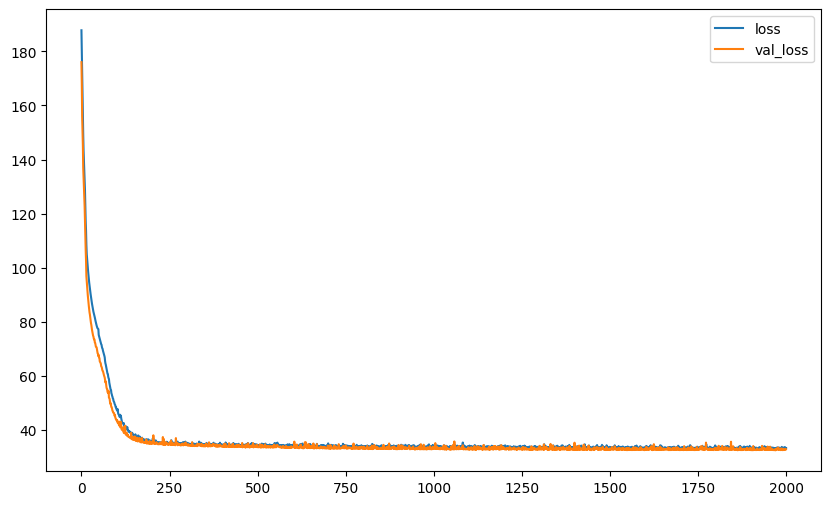

In [27]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

In [28]:
model3 = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model3.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model3.add(Dense(10,activation='relu'))

#Outputlayer mit einem Neuronen
model3.add(Dense(1))


model3.compile(optimizer=Adam(0.001), loss='mse')

In [29]:
r3 = model3.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

Epoch 1/2000
13/13 [==============================] - 1s 25ms/step - loss: 453.0630 - val_loss: 171.8032
Epoch 2/2000
13/13 [==============================] - 0s 10ms/step - loss: 115.1367 - val_loss: 73.1110
Epoch 3/2000
13/13 [==============================] - 0s 9ms/step - loss: 85.3208 - val_loss: 73.0290
Epoch 4/2000
13/13 [==============================] - 0s 8ms/step - loss: 81.1164 - val_loss: 66.3503
Epoch 5/2000
13/13 [==============================] - 0s 7ms/step - loss: 74.2716 - val_loss: 64.4706
Epoch 6/2000
13/13 [==============================] - 0s 8ms/step - loss: 72.3348 - val_loss: 63.7110
Epoch 7/2000
13/13 [==============================] - 0s 7ms/step - loss: 70.9386 - val_loss: 62.6637
Epoch 8/2000
13/13 [==============================] - 0s 7ms/step - loss: 69.9212 - val_loss: 61.9062
Epoch 9/2000
13/13 [==============================] - 0s 8ms/step - loss: 69.0727 - val_loss: 61.3941
Epoch 10/2000
13/13 [==============================] - 0s 7ms/step - loss: 68

In [30]:
yn_train_pred3 = model3.predict(X_train)
yn_test_pred3 = model3 .predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred3))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred3))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred3)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred3))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred3))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred3))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred3)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred3))

25/25 [==============================] - 0s 3ms/step
Trainingsdaten
MAE:  5.0277926488821905
MSE:  33.782118044813735
RMSE:  5.812238643140329
R2:  0.627216880001005

Testdaten
MAE:  4.897411738150066
MSE:  32.65957540115845
RMSE:  5.714855676319258
R2:  0.5905797011767566


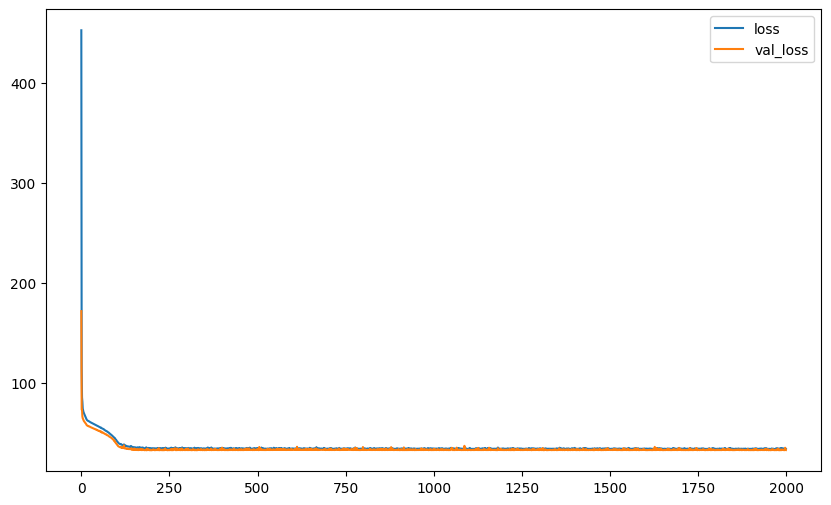

In [31]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r3.history['loss'], label='loss')
plt.plot(r3.history['val_loss'], label='val_loss')
plt.legend()

In [32]:
model4 = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model4.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model4.add(Dense(30,activation='relu'))

#Outputlayer mit einem Neuronen
model4.add(Dense(1))


model4.compile(optimizer=Adam(0.001), loss='mse')

In [33]:
r4 = model4.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

Epoch 1/2000
13/13 [==============================] - 1s 17ms/step - loss: 2192.0920 - val_loss: 1251.9097
Epoch 2/2000
13/13 [==============================] - 0s 6ms/step - loss: 803.5173 - val_loss: 408.5849
Epoch 3/2000
13/13 [==============================] - 0s 6ms/step - loss: 282.2393 - val_loss: 171.7672
Epoch 4/2000
13/13 [==============================] - 0s 6ms/step - loss: 168.0275 - val_loss: 138.8951
Epoch 5/2000
13/13 [==============================] - 0s 7ms/step - loss: 149.6738 - val_loss: 122.3402
Epoch 6/2000
13/13 [==============================] - 0s 5ms/step - loss: 130.6147 - val_loss: 106.6509
Epoch 7/2000
13/13 [==============================] - 0s 6ms/step - loss: 115.7691 - val_loss: 97.4199
Epoch 8/2000
13/13 [==============================] - 0s 7ms/step - loss: 106.9929 - val_loss: 91.3709
Epoch 9/2000
13/13 [==============================] - 0s 5ms/step - loss: 101.1634 - val_loss: 87.7792
Epoch 10/2000
13/13 [==============================] - 0s 6ms/st

In [34]:
yn_train_pred4 = model4.predict(X_train)
yn_test_pred4 = model4 .predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred4))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred4))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred4)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred4))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred4))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred4))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred4)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred4))

25/25 [==============================] - 0s 2ms/step
Trainingsdaten
MAE:  4.968807635397779
MSE:  32.90688891912864
RMSE:  5.736452642454973
R2:  0.6368749672693659

Testdaten
MAE:  4.884694971811712
MSE:  32.79162934678169
RMSE:  5.726397588954306
R2:  0.5889242734740456


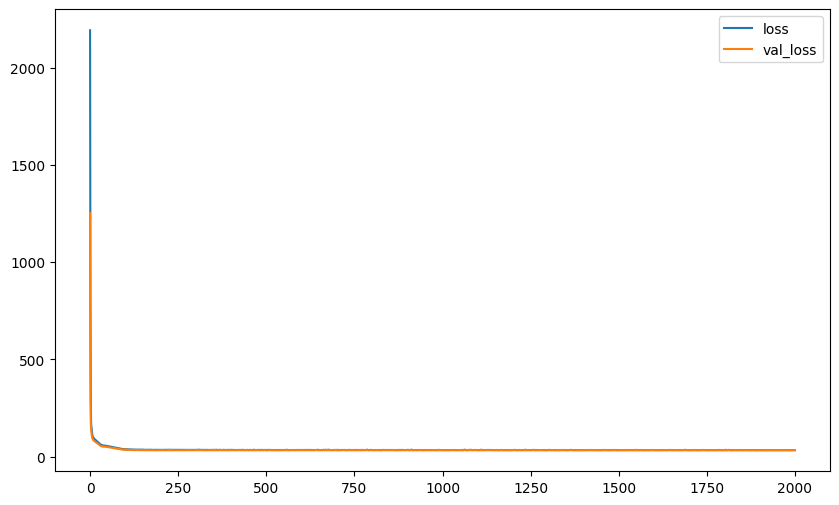

In [35]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r4.history['loss'], label='loss')
plt.plot(r4.history['val_loss'], label='val_loss')
plt.legend()

Die Ergebnisse aller Modelle sind ähnlich und das Modell 2 ist das beste unter ihnen, mit niedrigerem MSA und MAE und auch höherem RMSE und R2 sowohl in den Trainings- als auch in den Testsätzen.

##Aufgabe 7
Interpretieren Sie die Ergebnisse der multiplen linearen Regression und der neuronalen Netze im Zusammenhang.

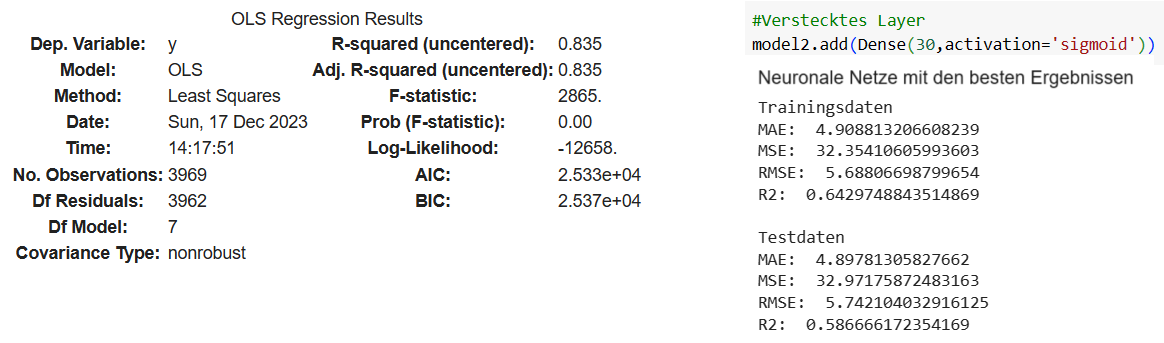

Wenn wir die Ergebnisse der multiplen linearen Regression und der neuronalen Netze vergleichen, können wir sehen, dass der R- und R^2-Wert der multiplen linearen Regression näher bei 1 liegt. Das bedeutet, dass die multiple lineare Regression wesentlich besser zu meinem Datensatz passt als die Modelle der neuronalen Netze. **->** Besseres Modell: Multiplen linearen Regression

---
**Zusätzliche Arbeit, die ich für meine Neugierde gemacht habe**

In [36]:
#Wenn wir ein neuronales Netz mit nur einer Eingabe- und einer Ausgabeschicht und ohne Aktivierungsfunktion haben, entspricht dies genau der linearen Regression
model_lineare_regression = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model_lineare_regression.add(Dense(X_train.shape[1]))
#Kein verstecktes Layer
#Outputlayer mit einem Neuronen(no activation function for linear regression)
model_lineare_regression.add(Dense(1))

model_lineare_regression.compile(optimizer=Adam(0.001), loss='mse')

In [37]:
r_lineare_regression = model_lineare_regression.fit(X_train, y_train.values,
                                                  validation_data=(X_test, y_test.values),
                                                  batch_size=256,
                                                  epochs=2000)

Epoch 1/2000
13/13 [==============================] - 1s 23ms/step - loss: 2665.0488 - val_loss: 2058.9524
Epoch 2/2000
13/13 [==============================] - 0s 6ms/step - loss: 1645.3148 - val_loss: 1226.0343
Epoch 3/2000
13/13 [==============================] - 0s 6ms/step - loss: 950.4989 - val_loss: 684.7772
Epoch 4/2000
13/13 [==============================] - 0s 8ms/step - loss: 519.5073 - val_loss: 373.8712
Epoch 5/2000
13/13 [==============================] - 0s 6ms/step - loss: 283.0703 - val_loss: 213.7272
Epoch 6/2000
13/13 [==============================] - 0s 7ms/step - loss: 167.6411 - val_loss: 139.2330
Epoch 7/2000
13/13 [==============================] - 0s 6ms/step - loss: 118.0729 - val_loss: 109.4021
Epoch 8/2000
13/13 [==============================] - 0s 7ms/step - loss: 99.5081 - val_loss: 98.8632
Epoch 9/2000
13/13 [==============================] - 0s 8ms/step - loss: 93.5334 - val_loss: 95.2688
Epoch 10/2000
13/13 [==============================] - 0s 7ms/s

In [38]:
yn_train_pred_lineare_regression = model_lineare_regression.predict(X_train)
yn_test_pred_lineare_regression = model_lineare_regression.predict(X_test)

25/25 [==============================] - 0s 1ms/step


In [39]:
print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred_lineare_regression))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred_lineare_regression))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred_lineare_regression)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred_lineare_regression))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred_lineare_regression))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred_lineare_regression))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred_lineare_regression)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred_lineare_regression))

Trainingsdaten
MAE:  5.075779767448545
MSE:  34.75288178053053
RMSE:  5.895157485642816
R2:  0.616504575529677

Testdaten
MAE:  4.955502267966644
MSE:  33.395386312989274
RMSE:  5.778874138877682
R2:  0.5813555787042859


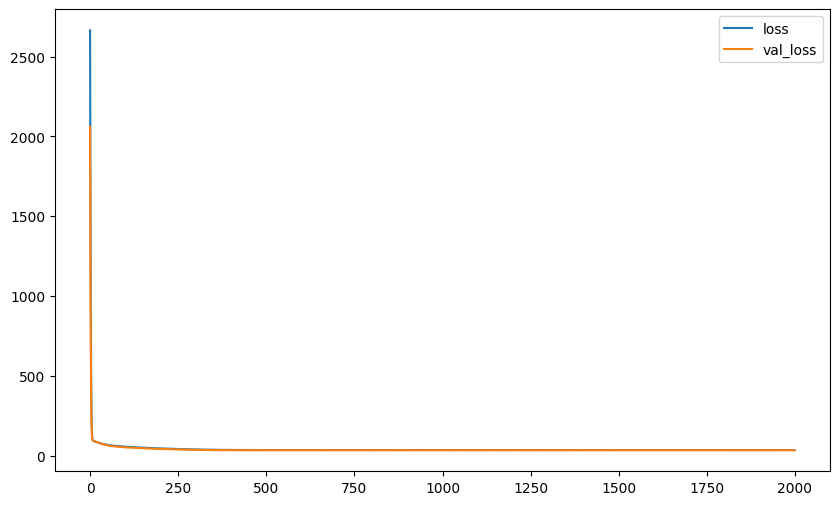

In [40]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.plot(r_lineare_regression.history['loss'], label='loss')
plt.plot(r_lineare_regression.history['val_loss'], label='val_loss')
plt.legend()